In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 2

In [2]:
user_cols = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=user_cols, engine='python')
print(users.head())
print(users.shape)

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455
(6040, 5)


In [3]:
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rating_cols, engine='python')
print(ratings.head())
print(ratings.shape)

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
(1000209, 4)


In [4]:
movie_cols = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=movie_cols, engine='python')
print(movies.head())
print(movies.shape)

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
(3883, 3)


In [5]:
1000209/6040

165.5975165562914

(array([ 56174.,      0., 107557.,      0.,      0., 261197.,      0.,
        348971.,      0., 226310.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

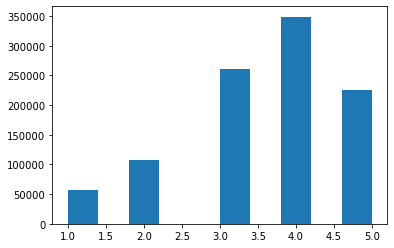

In [6]:
plt.hist(ratings['rating'])

[4.146846413095811, 3.20114122681883, 3.01673640167364, 2.7294117647058824, 3.0067567567567566, 3.8787234042553194, 3.410480349344978, 3.014705882352941, 2.656862745098039, 3.5405405405405403]


(array([ 38.,  58., 192., 316., 527., 849., 876., 619., 149.,  14.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

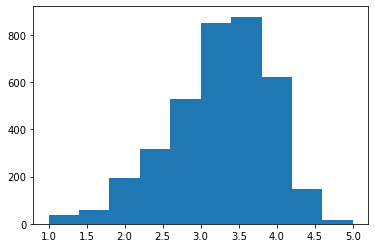

In [7]:
movie_rating_avg = []
for i in range(movies.shape[0]):
    movie_rating_avg.append(ratings[ratings['movie_id'] == (i+1)].loc[:,'rating'].mean())
print(movie_rating_avg[0:10])
plt.hist(movie_rating_avg)

[4.188679245283019, 3.7131782945736433, 3.9019607843137254, 4.190476190476191, 3.1464646464646466, 3.9014084507042255, 4.32258064516129, 3.884892086330935, 3.7358490566037736, 4.114713216957606]


(array([   3.,    0.,   15.,   62.,  275.,  907., 2026., 2019.,  675.,
          58.]),
 array([1.01538462, 1.41014245, 1.80490028, 2.19965812, 2.59441595,
        2.98917379, 3.38393162, 3.77868946, 4.17344729, 4.56820513,
        4.96296296]),
 <a list of 10 Patch objects>)

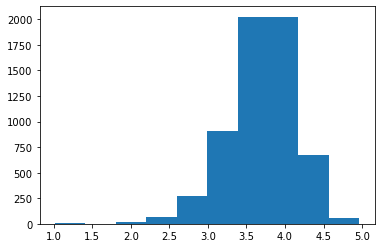

In [8]:
user_rating_avg = []
for i in range(users.shape[0]):
    user_rating_avg.append(ratings[ratings['user_id'] == (i+1)].loc[:,'rating'].mean())
print(user_rating_avg[0:10])
plt.hist(user_rating_avg)

- 总共有6040个用户
- 总共有3883个用户
- 平均每个用户对166个电影进行了评分

划分数据集为训练集和验证集时对每一个用户的评分记录进行分割，确保训练集和验证集中都有该用户的评分记录。

# Task 3

In [18]:
# generate user-item rating matrix
def generate_rating_matrix(ratings, num_users, num_items, users, items):
    res = np.zeros((num_users, num_items))
    df_res = pd.DataFrame(res, columns=items, index=users)
    for _, row in ratings.iterrows():
        df_res.loc[row['user_id'], row['movie_id']] = row['rating']
    return df_res

# User similarity(Pearson similarity)
def user_sim(user_1, user_2, rating_matrix):
    user_1_vec = (rating_matrix.loc[user_1,:]).tolist()
    user_2_vec = (rating_matrix.loc[user_2,:]).tolist()
    user_1_ratings = [x for index, x in enumerate(user_1_vec) if x*user_2_vec[index]!=0]
    user_2_ratings = [x for index, x in enumerate(user_2_vec) if x*user_1_vec[index]!=0]
    if not user_1_vec:
        return np.nan
    return np.corrcoef(np.array(user_1_ratings), np.array(user_2_ratings))[0][1]

def item_sim(item_1, item_2, rating_matrix):
    item_1_vec = (rating_matrix.loc[:,item_1]).tolist()
    item_2_vec = (rating_matrix.loc[:,item_2]).tolist()
    item_1_ratings = [x for index, x in enumerate(item_1_vec) if x*item_2_vec[index]!=0]
    item_2_ratings = [x for index, x in enumerate(item_2_vec) if x*item_1_vec[index]!=0]
    if not item_1_ratings:
        return np.nan
    return np.corrcoef(np.array(item_1_ratings), np.array(item_2_ratings))[0][1]


num_users = users.shape[0]
num_movies = movies.shape[0]
user_id = users['user_id'].unique()
movie_id = movies['movie_id'].unique()
rating_matrix = generate_rating_matrix(ratings, num_users, num_movies, user_id, movie_id)
user_similarity = user_sim(1, 2, rating_matrix)
item_similarity = item_sim(1, 2, rating_matrix)
print(user_similarity)
print(item_similarity)

0.4166666666666667
0.18746674483431516


# Task 4

In [ ]:
# user-cf
for u in user_id:
    user_sim_dict = {}
    for v in user_id:
        if v != u:
            user_sim_dict[v] = user_sim(u, v, rating_matrix)